# Breaking down the data by frequency and time period

In [1]:
import pandas as pd
import pandas_profiling
from pandas_profiling import ProfileReport
from pandas_profiling.utils.cache import cache_file

In [2]:
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
df = pd.read_csv('/Users/wickedbear/Coding/Projects/Spread_Series/CSVs/daily_spread.csv')
df_w = pd.read_csv('/Users/wickedbear/Coding/Projects/Spread_Series/CSVs/spread_weekly.csv')
df_m = pd.read_csv('/Users/wickedbear/Coding/Projects/Spread_Series/CSVs/spread_monthly.csv')

In [4]:
df.head()

,Date,Spread
0,1996-12-31,0.66
1,1997-01-02,0.56
2,1997-01-03,0.57
3,1997-01-06,0.57
4,1997-01-07,0.56


In [5]:
df_w.head()

,Date,Spread
0,1997-01-05,0.596667
1,1997-01-12,0.564000
2,1997-01-19,0.570000
3,1997-01-26,0.557500
4,1997-02-02,0.550000


In [6]:
df_m.tail()

,Date,Spread
276,2019-12-01,1.052381
277,2020-01-01,1.023333
278,2020-02-01,1.105263
279,2020-03-01,2.546364
280,2020-04-01,2.633846


In [7]:
df_list = [df, df_w, df_m]

In [8]:
for thing in df_list:
    thing['Date'] = pd.to_datetime(thing['Date'])

In [9]:
df.head()

,Date,Spread
0,1996-12-31,0.66
1,1997-01-02,0.56
2,1997-01-03,0.57
3,1997-01-06,0.57
4,1997-01-07,0.56


In [10]:
df.set_index('Date', inplace=True)
df_w.set_index('Date', inplace=True)
df_m.set_index('Date', inplace=True)

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 5821 entries, 1996-12-31 to 2020-04-20
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Spread  5821 non-null   float64
dtypes: float64(1)
memory usage: 91.0 KB


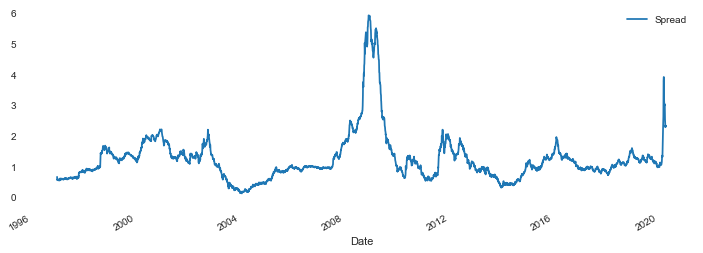

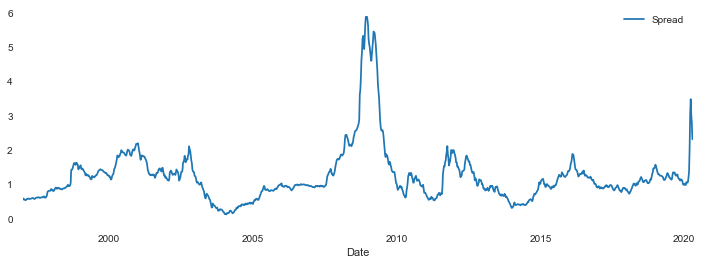

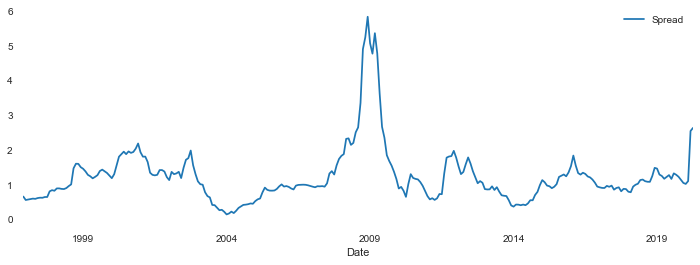

In [12]:
for thing in df_list:
    thing.plot(figsize = (12, 4))

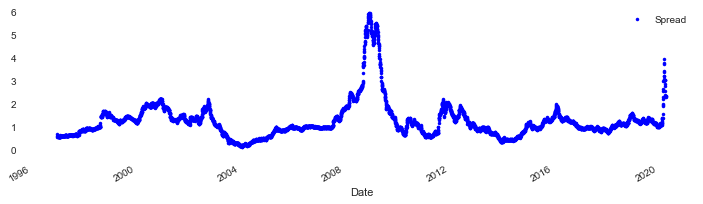

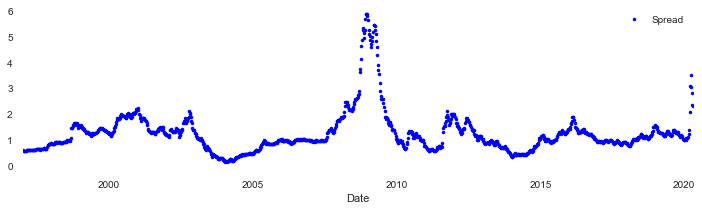

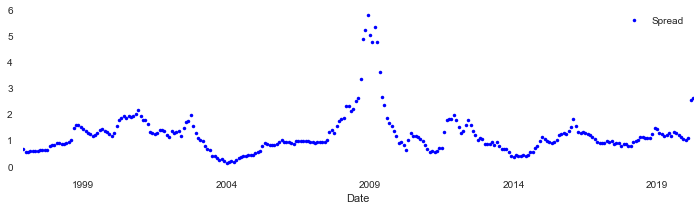

In [13]:
for thing in df_list:
    thing.plot(figsize = (12,3), style = '.b')

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x1290128d0>]],
      dtype=object)

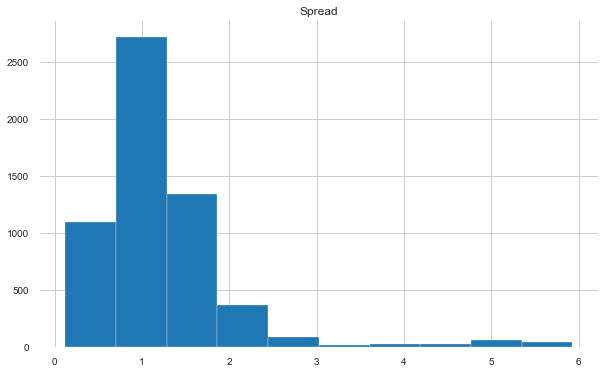

In [14]:
df.hist(figsize = (10,6))

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x10305f4d0>]],
      dtype=object)

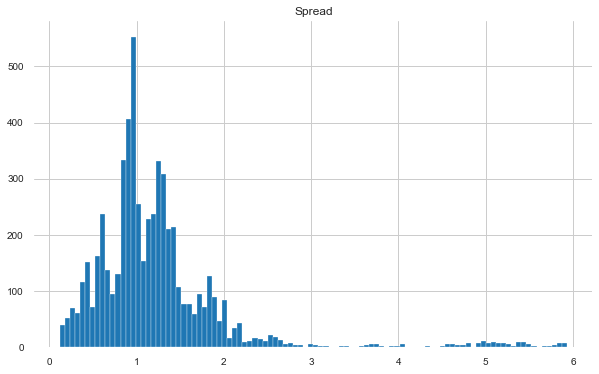

In [15]:
df.hist(figsize = (10,6), bins=100)

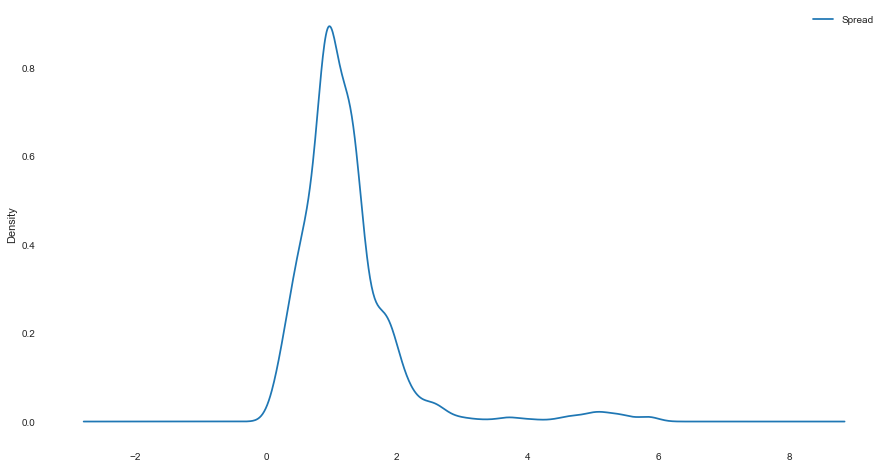

In [16]:
# Plot a density plot for nyse dataset
df.plot(kind='kde', figsize = (15,8));

# Slicing the Data and Re-running

## Dot-Com Bubble

In [17]:
df_2000 = df['1996':'2000']

In [18]:
df_2000

,Spread
Date,
1996-12-31,0.66
1997-01-02,0.56
1997-01-03,0.57
1997-01-06,0.57
1997-01-07,0.56
...,...
2000-12-22,2.19
2000-12-26,2.20
2000-12-27,2.20


## Great Recession

In [19]:
df_2009 = df['2000':'2009']

In [20]:
df_2009

,Spread
Date,
2000-01-03,1.24
2000-01-04,1.26
2000-01-05,1.22
2000-01-06,1.22
2000-01-07,1.25
...,...
2009-12-24,1.02
2009-12-28,1.02
2009-12-29,1.02


## Through 4/20

In [21]:
df_2020 = df['2009':'2020']

In [22]:
df_2020

,Spread
Date,
2009-01-02,5.52
2009-01-05,5.44
2009-01-06,5.31
2009-01-07,5.19
2009-01-08,5.13
...,...
2020-04-14,2.28
2020-04-15,2.34
2020-04-16,2.33


In [23]:
df_recs = [df_2000, df_2009, df_2020]

## Plotting

Line Plot

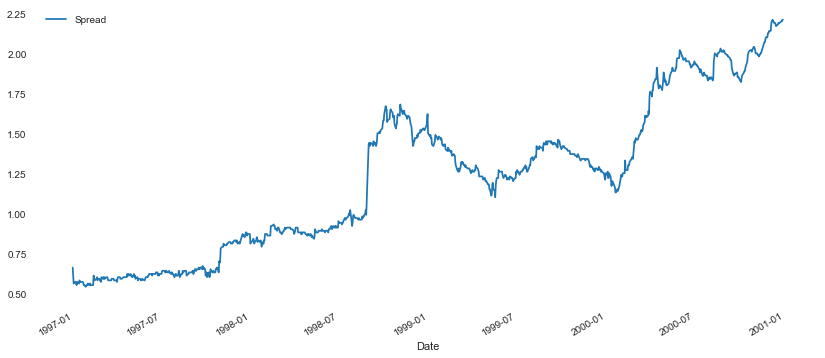

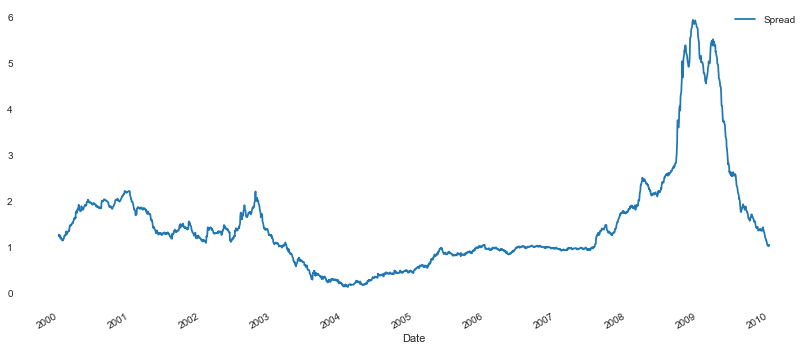

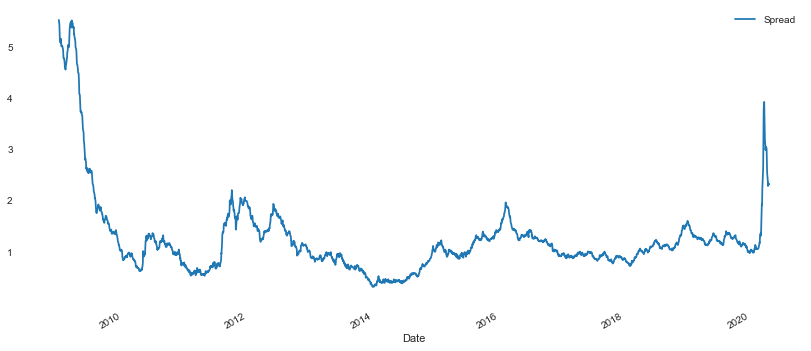

In [24]:
#line plot
for thing in df_recs:
    thing.plot(figsize = (14,6))

Dot Plot

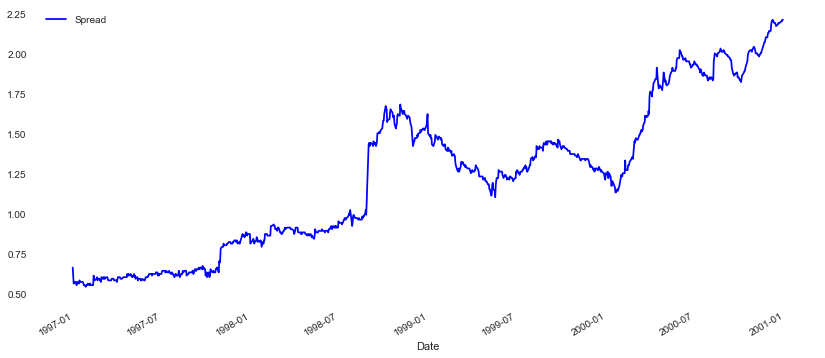

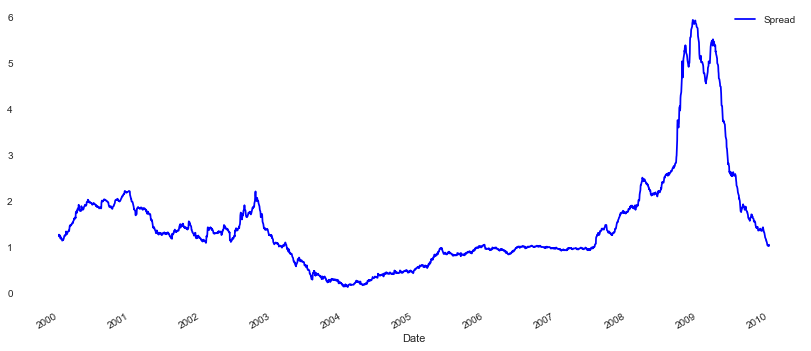

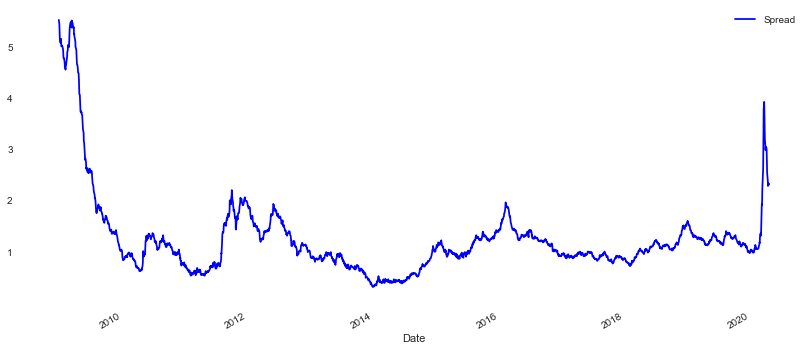

In [25]:
#dot plot
for thing in df_recs:
    thing.plot(figsize = (14,6), style='b')

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x128c43310>]],
      dtype=object)

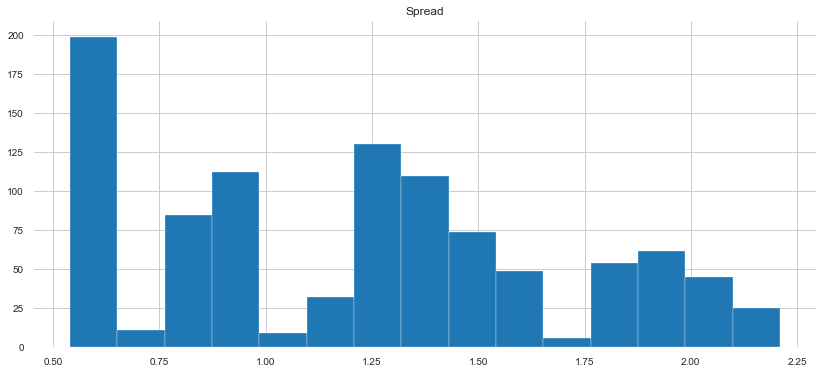

In [26]:
df_2000.hist(figsize=(14,6), bins=15)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x128c43a10>]],
      dtype=object)

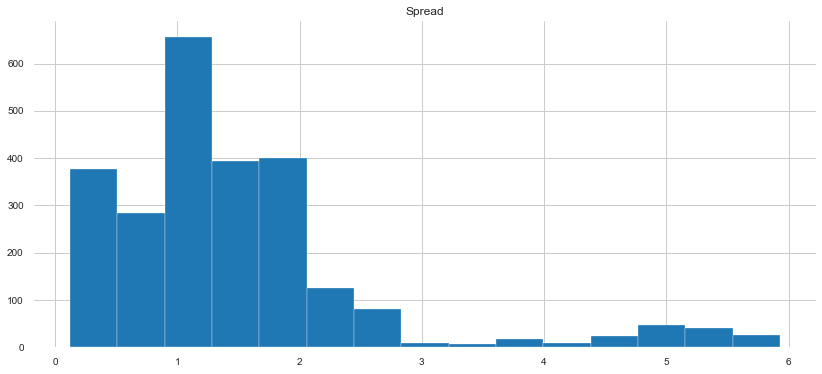

In [27]:
df_2009.hist(figsize=(14,6), bins=15)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x128c43ed0>]],
      dtype=object)

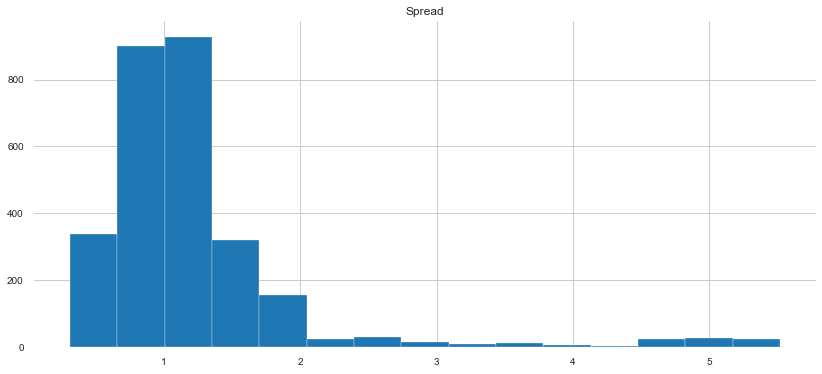

In [28]:
df_2020.hist(figsize=(14,6), bins=15)

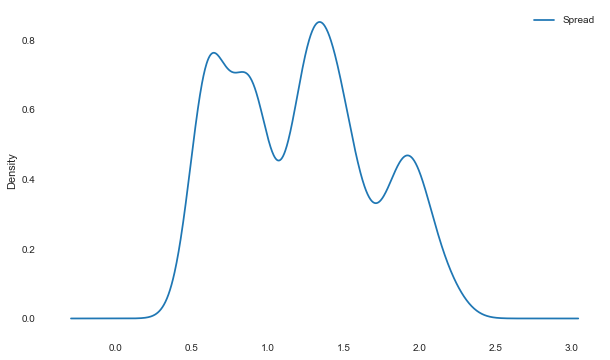

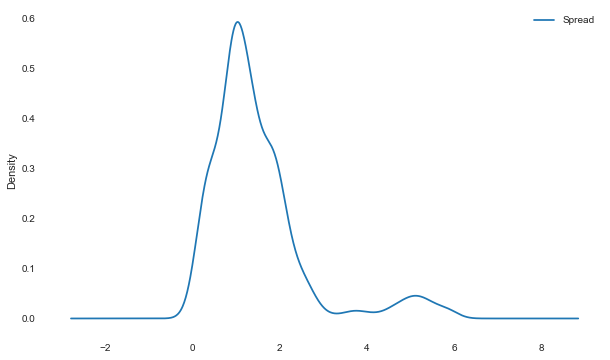

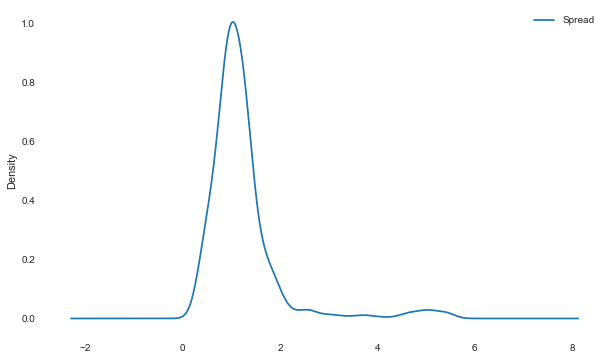

In [29]:
for thing in df_recs:
    thing.plot(kind='kde', figsize = (10,6))

## Yearly Data

In [30]:
annual_df = df.resample('A')
annual_df_mean = annual_df.mean()

In [31]:
annual_df_mean

,Spread
Date,
1996-12-31,0.660000
1997-12-31,0.644080
1998-12-31,1.118760
1999-12-31,1.321036
2000-12-31,1.803386
2001-12-31,1.484980
2002-12-31,1.462960
2003-12-31,0.592240
2004-12-31,0.325840


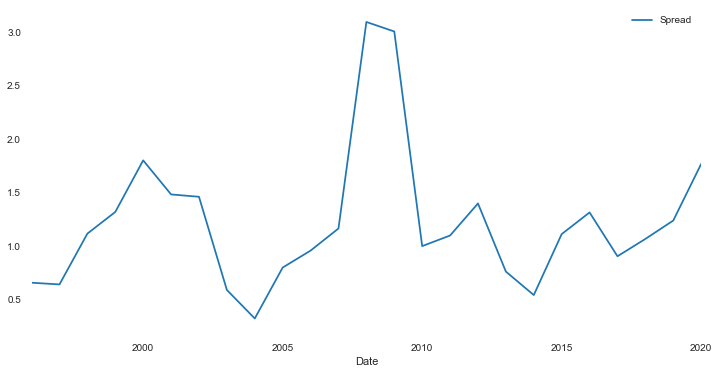

In [33]:
annual_df_mean.plot(figsize = (12,6))

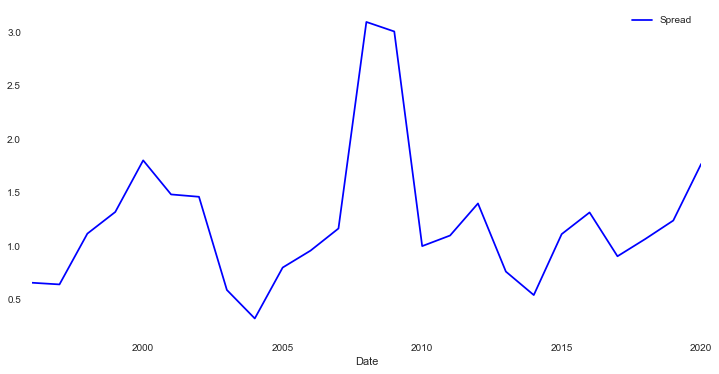

In [34]:
annual_df_mean.plot(figsize = (12,6), style='b')

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x12da2f5d0>]],
      dtype=object)

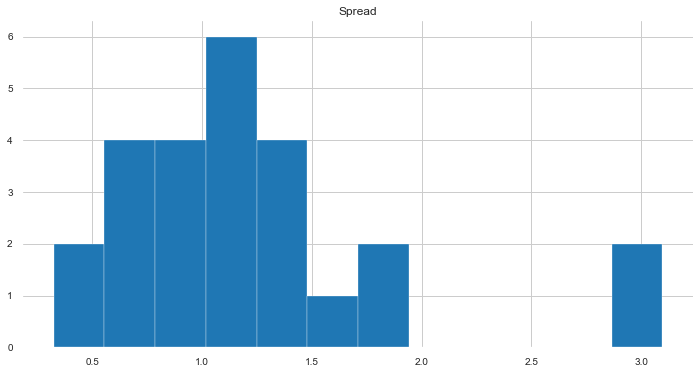

In [48]:
annual_df_mean.hist(figsize=(12,6), bins=12)

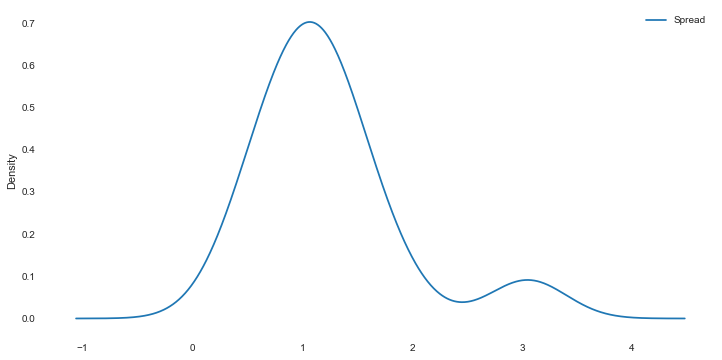

In [49]:
annual_df_mean.plot(kind='kde', figsize=(12,6))